## KHAN AAMIR JAWEED AHMED
## ROLL NO : 32
## BRANCH : AIML

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


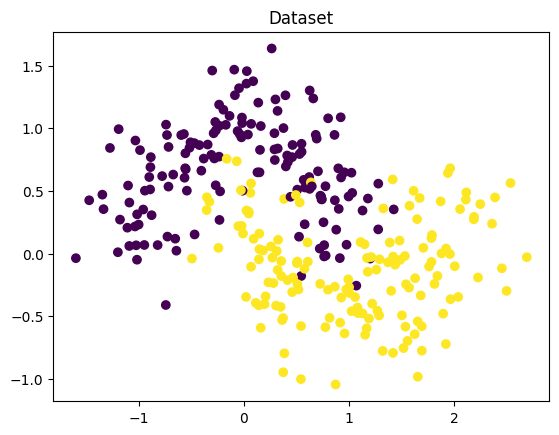

In [2]:
x,y=make_moons(n_samples = 300 , noise=0.25 , random_state=42)
plt.scatter(x[:,0],x[:,1],c=y)
plt.title("Dataset")
plt.show()

In [3]:
x_train , x_test , y_train , y_test = train_test_split(
    x,y, test_size=0.3 , random_state=0
)

In [4]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred_lr = lr.predict(x_test_scaled)
print("Logisitic Regression")
print("Accuracy:",accuracy_score(y_test,y_pred_lr))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_lr))

Logisitic Regression
Accuracy: 0.8777777777777778
Confusion Matrix:
 [[34  5]
 [ 6 45]]


In [9]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print("Logisitic Regression")
print("Accuracy:",accuracy_score(y_test,y_pred_lr))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_lr))

Logisitic Regression
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[34  5]
 [ 7 44]]


In [11]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train_scaled,y_train)
y_pred_dt = dt.predict(x_test_scaled)
print("Decision Tree")
print("Accuracy:",accuracy_score(y_test,y_pred_dt))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_dt))

Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


In [13]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree")
print("Accuracy:",accuracy_score(y_test,y_pred_dt))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_dt))

Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


In [15]:
k=KNeighborsClassifier(n_neighbors=5)
k.fit(x_train_scaled,y_train)
y_pred_k = k.predict(x_test_scaled)
print("K Neighbors Classifier")
print("Accuracy:",accuracy_score(y_test,y_pred_k))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_k))
k=KNeighborsClassifier(n_neighbors=3)
k.fit(x_train,y_train)
y_pred_k = k.predict(x_test)
print("K Neighbors Classifier")
print("Accuracy:",accuracy_score(y_test,y_pred_k))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_k))

K Neighbors Classifier
Accuracy: 0.9111111111111111
Confusion Matrix:
 [[38  1]
 [ 7 44]]
K Neighbors Classifier
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[38  1]
 [ 5 46]]


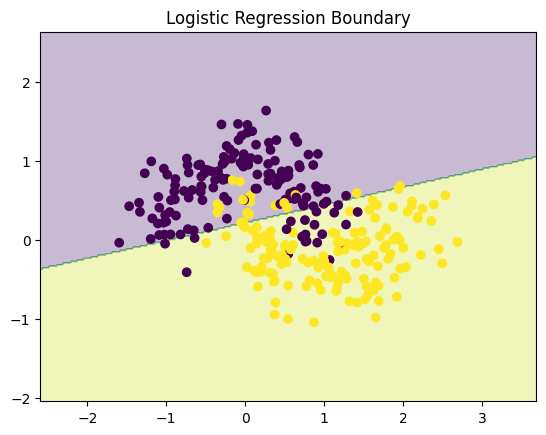

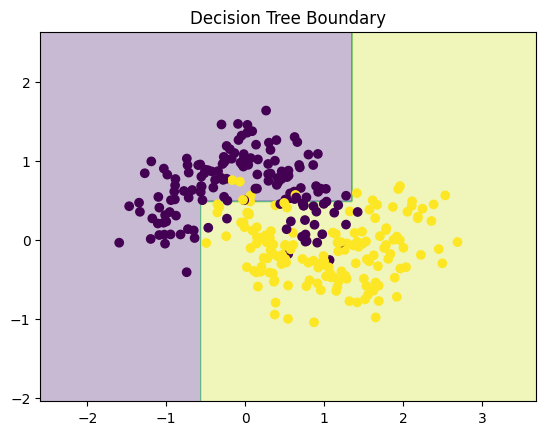

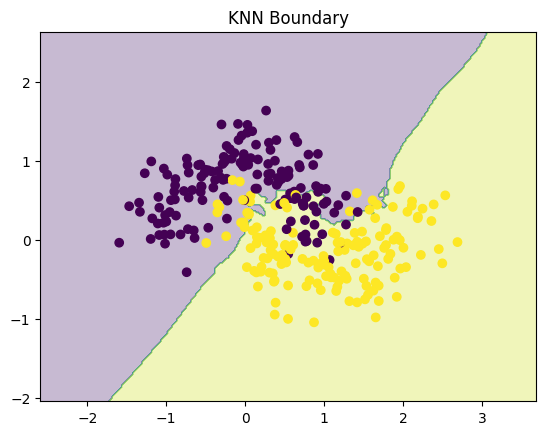

In [16]:
def plot_boundary(model,scaled,title):
    h=0.02
    x_min , x_max = x[:,0].min()-1,x[:,0].max()+1
    y_min , y_max= x[:,1].min()-1,x[:,1].max()+1

    xx ,yy = np.meshgrid(
        np.arange(x_min ,x_max ,h),
        np.arange(y_min ,y_max ,h)
    )

    grid = np.c_[xx.ravel(),yy.ravel()]

    if scaled :
        grid = scaler.transform(grid)

    Z=model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx,yy,Z,alpha=0.3)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.title(title)
    plt.show()

plot_boundary(lr,True,"Logistic Regression Boundary")
plot_boundary(dt,False,"Decision Tree Boundary")
plot_boundary(k,True,"KNN Boundary")
